In [1]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

tt_list = [train, test]

df = pd.concat(tt_list, sort=False)

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


survival - Survival (0 = No; 1 = Yes)

class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

name - Name

sex - Sex

age - Age

sibsp - Number of Siblings/Spouses Aboard

parch - Number of Parents/Children Aboard

ticket - Ticket Number

fare - Passenger Fare

cabin - Cabin

embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe40b10cdd8>,
      dtype=object)

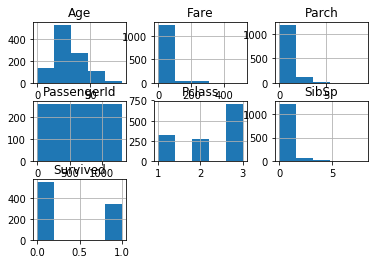

In [14]:
df.hist(bins=5)

In [35]:
#print(df.head(20))

In [24]:
df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

In [34]:
#df.info()

In [33]:
#df.isin([0]).sum(axis=0)

Almost 40% of Survived is null, 20% of ages are missing, 77% of cabin numbers are missing, and less than 1% of embarked and fare values are missing.

In [5]:
# replace missing cabin numbers 
df.Cabin = df.Cabin.fillna('UK')

In [8]:
df.head(10)
df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin           0.000000
Embarked        0.152788
dtype: float64

In [10]:
# replace missing fare with median fare
df.Fare = df.Fare.fillna(df.Fare.median())

In [11]:
df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin           0.000000
Embarked        0.152788
dtype: float64

In [12]:
# find out counts for embark to find out which one occurs most frequently
embark = df.Embarked.value_counts()
embark

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [18]:
# replace embarked with most frequently occuring embarked code
embark = df.Embarked.value_counts().index[0]

df.Embarked = df.Embarked.fillna(embark)

In [21]:
df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin           0.000000
Embarked        0.000000
dtype: float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
